## Evaluation of Group Recommendation Algorithms with Aggregation Strategy: "Dictatorship"

In this analysis, the group prediction was chosen via dictatorship. The dictator user was chosen as the user with the highest social hierarchy value among the group memebers

### Loading recommendation output and test data

In [1]:
## Load Statistics
from lenskit import topn
from lenskit.metrics.topn import ndcg
import pandas as pd
from matplotlib import pyplot as plt
from lenskit.metrics.predict import rmse
from IPython.display import set_matplotlib_formats


# Load results files: n = 100
recs100 = pd.read_csv('output/DICTATORSHIP-archived/DICTATORSHIP-100/recs.csv')
test_data100 = pd.read_csv('output/DICTATORSHIP-archived/DICTATORSHIP-100/testdata.csv')
preds100 = pd.read_csv('output/DICTATORSHIP-archived/DICTATORSHIP-100/preds.csv')

# Load results files: n = 10
recs10 = pd.read_csv('output/DICTATORSHIP-archived/DICTATORSHIP-10/recs.csv')
test_data10 = pd.read_csv('output/DICTATORSHIP-archived/DICTATORSHIP-10/testdata.csv')
preds10 = pd.read_csv('output/DICTATORSHIP-archived/DICTATORSHIP-10/preds.csv')

# Load results files: n = 5
recs5 = pd.read_csv('output/DICTATORSHIP-archived/DICTATORSHIP-5/recs.csv')
test_data5 = pd.read_csv('output/DICTATORSHIP-archived/DICTATORSHIP-5/testdata.csv')
preds5 = pd.read_csv('output/DICTATORSHIP-archived/DICTATORSHIP-5/preds.csv')

# Load results files: n = 3
recs3 = pd.read_csv('output/DICTATORSHIP-archived/DICTATORSHIP-3/recs.csv')
test_data3 = pd.read_csv('output/DICTATORSHIP-archived/DICTATORSHIP-3/testdata.csv')
preds3 = pd.read_csv('output/DICTATORSHIP-archived/DICTATORSHIP-3/preds.csv')

### 1. Recommendation Metrics: Normalized Discounted Cummulative Gain: nDCG

In [2]:
rla = topn.RecListAnalysis()
rla.add_metric(topn.ndcg)
rla.add_metric(topn.precision)
rla.add_metric(topn.recall)

results100 = rla.compute(recs100, test_data100)
ndcg100 = results100.groupby('Algorithm').ndcg.mean()
precision100 = results100.groupby('Algorithm').precision.mean()
recall100 = results100.groupby('Algorithm').recall.mean()

results10 = rla.compute(recs10, test_data10)
ndcg10 = results10.groupby('Algorithm').ndcg.mean()
precision10 = results10.groupby('Algorithm').precision.mean()
recall10 = results10.groupby('Algorithm').recall.mean()

results5 = rla.compute(recs5, test_data5)
ndcg5 = results5.groupby('Algorithm').ndcg.mean()
precision5 = results5.groupby('Algorithm').precision.mean()
recall5 = results5.groupby('Algorithm').recall.mean()

results3 = rla.compute(recs3, test_data3)
ndcg3 = results3.groupby('Algorithm').ndcg.mean()
precision3 = results3.groupby('Algorithm').precision.mean()
recall3 = results3.groupby('Algorithm').recall.mean()

In [3]:

df = pd.DataFrame({'Algorithm':ndcg100.index, 'ndcg':ndcg100.values, 'n':100})
ndcg_df = pd.concat([df, pd.DataFrame({'Algorithm':ndcg10.index, 'ndcg':ndcg10.values, 'n':10}), pd.DataFrame({'Algorithm':ndcg5.index, 'ndcg':ndcg5.values, 'n':5}), pd.DataFrame({'Algorithm':ndcg3.index, 'ndcg':ndcg3.values, 'n':3})], ignore_index=True)
print(ndcg_df.sort_values(by=['n', 'ndcg'], ascending=False))



Algorithm      ndcg    n
0      domex  0.077436  100
5     socsim  0.076434  100
3        rel  0.076393  100
7       symp  0.076392  100
1     hierch  0.076240  100
4      socap  0.075700  100
8       trst  0.075234  100
6     soxsim  0.075143  100
2         ii  0.067278  100
9      domex  0.046843   10
14    socsim  0.046843   10
10    hierch  0.045919   10
15    soxsim  0.045919   10
13     socap  0.043773   10
12       rel  0.043530   10
16      symp  0.043530   10
17      trst  0.043530   10
11        ii  0.034905   10
21       rel  0.044629    5
26      trst  0.044629    5
23    socsim  0.044078    5
18     domex  0.040660    5
19    hierch  0.040660    5
22     socap  0.040660    5
24    soxsim  0.040660    5
25      symp  0.040660    5
20        ii  0.023259    5
28    hierch  0.036753    3
31     socap  0.036753    3
32    socsim  0.036753    3
33    soxsim  0.036753    3
34      symp  0.036753    3
35      trst  0.036753    3
29        ii  0.035903    3
27     domex  0.031746 

/Users/safey.halim/.local/share/virtualenvs/gurator-eval-3p0ORahF/lib/python3.7/site-packages/ipykernel_launcher.py:3: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  This is separate from the ipykernel package so we can avoid doing imports until


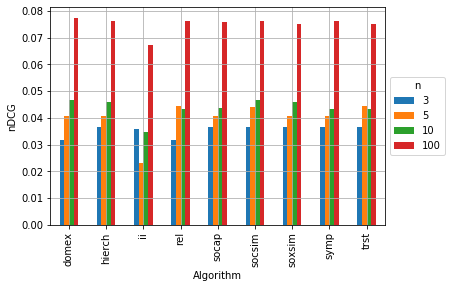

In [4]:
ndcg_df.pivot("Algorithm", "n", "ndcg").plot(kind='bar')

ax = plt.subplot(111)
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), title='n')
ax.grid(zorder=0)
plt.ylabel('nDCG')
plt.show()

## Precision at n

In [5]:
df = pd.DataFrame({'Algorithm':precision100.index, 'precision':precision100.values, 'n':100})
precision_df = pd.concat([df, pd.DataFrame({'Algorithm':precision10.index, 'precision':precision10.values, 'n':10}), pd.DataFrame({'Algorithm':precision5.index, 'precision':precision5.values, 'n':5}), pd.DataFrame({'Algorithm':precision3.index, 'precision':precision3.values, 'n':3})], ignore_index=True)
print(precision_df.sort_values(by=['n', 'precision'], ascending=False))

Algorithm  precision    n
0      domex   0.003254  100
3        rel   0.003254  100
1     hierch   0.003175  100
4      socap   0.003175  100
5     socsim   0.003175  100
6     soxsim   0.003175  100
7       symp   0.003175  100
8       trst   0.003175  100
2         ii   0.002460  100
9      domex   0.010317   10
10    hierch   0.010317   10
14    socsim   0.010317   10
15    soxsim   0.010317   10
12       rel   0.009524   10
13     socap   0.009524   10
16      symp   0.009524   10
17      trst   0.009524   10
11        ii   0.006349   10
21       rel   0.012698    5
23    socsim   0.012698    5
26      trst   0.012698    5
18     domex   0.011111    5
19    hierch   0.011111    5
22     socap   0.011111    5
24    soxsim   0.011111    5
25      symp   0.011111    5
20        ii   0.006349    5
29        ii   0.015873    3
28    hierch   0.013228    3
31     socap   0.013228    3
32    socsim   0.013228    3
33    soxsim   0.013228    3
34      symp   0.013228    3
35      trst   0.

/Users/safey.halim/.local/share/virtualenvs/gurator-eval-3p0ORahF/lib/python3.7/site-packages/ipykernel_launcher.py:3: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  This is separate from the ipykernel package so we can avoid doing imports until


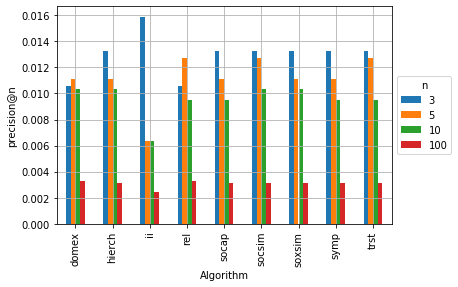

In [6]:
precision_df.pivot("Algorithm", "n", "precision").plot(kind='bar')

ax = plt.subplot(111)
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), title='n')
ax.grid(zorder=0)
plt.ylabel('precision@n')
plt.show()

## Recall at n

In [7]:
df = pd.DataFrame({'Algorithm':recall100.index, 'recall':recall100.values, 'n':100})
recall_df = pd.concat([df, pd.DataFrame({'Algorithm':recall10.index, 'recall':recall10.values, 'n':10}), pd.DataFrame({'Algorithm':recall5.index, 'recall':recall5.values, 'n':5}), pd.DataFrame({'Algorithm':recall3.index, 'recall':recall3.values, 'n':3})], ignore_index=True)
print(recall_df.sort_values(by=['n', 'recall'], ascending=False))

Algorithm    recall    n
0      domex  0.317460  100
3        rel  0.317460  100
1     hierch  0.309524  100
4      socap  0.309524  100
5     socsim  0.309524  100
6     soxsim  0.309524  100
7       symp  0.309524  100
8       trst  0.309524  100
2         ii  0.242063  100
9      domex  0.091270   10
10    hierch  0.091270   10
14    socsim  0.091270   10
15    soxsim  0.091270   10
12       rel  0.083333   10
13     socap  0.083333   10
16      symp  0.083333   10
17      trst  0.083333   10
11        ii  0.055556   10
21       rel  0.063492    5
23    socsim  0.063492    5
26      trst  0.063492    5
18     domex  0.055556    5
19    hierch  0.055556    5
22     socap  0.055556    5
24    soxsim  0.055556    5
25      symp  0.055556    5
20        ii  0.031746    5
29        ii  0.047619    3
28    hierch  0.039683    3
31     socap  0.039683    3
32    socsim  0.039683    3
33    soxsim  0.039683    3
34      symp  0.039683    3
35      trst  0.039683    3
27     domex  0.031746 

/Users/safey.halim/.local/share/virtualenvs/gurator-eval-3p0ORahF/lib/python3.7/site-packages/ipykernel_launcher.py:3: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  This is separate from the ipykernel package so we can avoid doing imports until


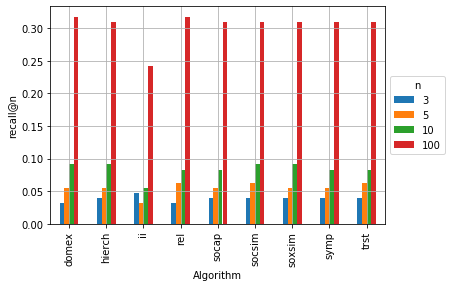

In [8]:
recall_df.pivot("Algorithm", "n", "recall").plot(kind='bar')

ax = plt.subplot(111)
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), title='n')
ax.grid(zorder=0)
plt.ylabel('recall@n')
plt.show()

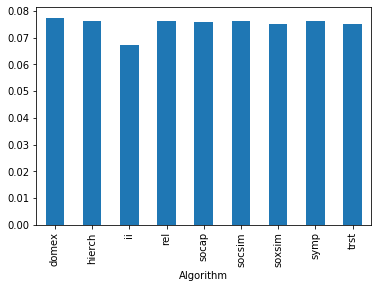

In [9]:
#set_matplotlib_formats('svg')
results100.groupby('Algorithm').ndcg.mean().plot.bar()

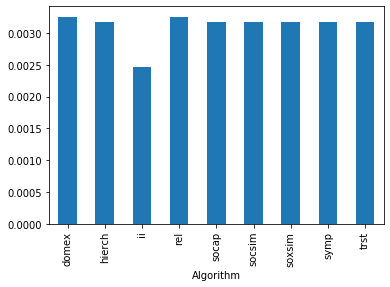

In [10]:
results100.groupby('Algorithm').precision.mean().plot.bar()

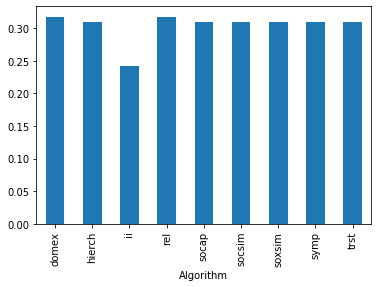

In [11]:
results100.groupby('Algorithm').recall.mean().plot.bar()

### 2. Prediction Metrics: RMSE

Algorithm
domex     0.424875
hierch    0.424699
ii        0.344811
rel       0.424116
socap     0.424649
socsim    0.427047
soxsim    0.424353
symp      0.425047
trst      0.424795
dtype: float64
user
1      0.383273
2      0.842098
3      0.937032
4      0.597685
5      0.603120
         ...   
134    0.344375
135    0.518264
136    0.227183
137    0.255103
138    0.266965
Length: 127, dtype: float64


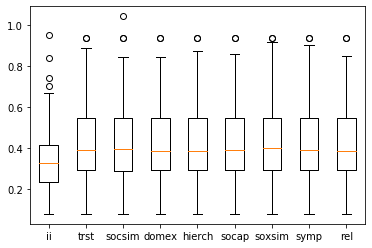

"\nprint('Item Item Knn: max rmse per user = ' + str(user_rmse_ii.max()) + ', min rmse per user = ' + str(user_rmse_ii.min()) + ', average rmse per user = ' + str(user_rmse_ii.mean()))\nprint('Trust: max rmse per user = ' + str(user_rmse_trst.max()) + ', min rmse per user = ' + str(user_rmse_trst.min()) + ', average rmse per user = ' + str(user_rmse_trst.mean()))\nprint('Social Similarity: max rmse per user = ' + str(user_rmse_socsim.max()) + ', min rmse per user = ' + str(user_rmse_socsim.min()) + ', average rmse per user = ' + str(user_rmse_socsim.mean()))\nprint('Domain Expertise: max rmse per user = ' + str(user_rmse_domex.max()) + ', min rmse per user = ' + str(user_rmse_domex.min()) + ', average rmse per user = ' + str(user_rmse_domex.mean()))\nprint('Social Hierarchy: max rmse per user = ' + str(user_rmse_hierch.max()) + ', min rmse per user = ' + str(user_rmse_hierch.min()) + ', average rmse per user = ' + str(user_rmse_hierch.mean()))\nprint('Social Capital: max rmse per user 

In [12]:
user_rmse = (preds100.groupby(['Algorithm', 'user']).apply(lambda df: rmse(df.prediction, df.rating))).dropna()
print(user_rmse.groupby('Algorithm').mean())

print(user_rmse['domex'])

plt.boxplot((user_rmse['ii'], user_rmse['trst'], user_rmse['socsim'], user_rmse['domex'], user_rmse['hierch'], user_rmse['socap'], user_rmse['soxsim'], user_rmse['symp'], user_rmse['rel']), labels= ['ii', 'trst', 'socsim', 'domex', 'hierch', 'socap', 'soxsim', 'symp', 'rel'])
plt.show()


"""
print('Item Item Knn: max rmse per user = ' + str(user_rmse_ii.max()) + ', min rmse per user = ' + str(user_rmse_ii.min()) + ', average rmse per user = ' + str(user_rmse_ii.mean()))
print('Trust: max rmse per user = ' + str(user_rmse_trst.max()) + ', min rmse per user = ' + str(user_rmse_trst.min()) + ', average rmse per user = ' + str(user_rmse_trst.mean()))
print('Social Similarity: max rmse per user = ' + str(user_rmse_socsim.max()) + ', min rmse per user = ' + str(user_rmse_socsim.min()) + ', average rmse per user = ' + str(user_rmse_socsim.mean()))
print('Domain Expertise: max rmse per user = ' + str(user_rmse_domex.max()) + ', min rmse per user = ' + str(user_rmse_domex.min()) + ', average rmse per user = ' + str(user_rmse_domex.mean()))
print('Social Hierarchy: max rmse per user = ' + str(user_rmse_hierch.max()) + ', min rmse per user = ' + str(user_rmse_hierch.min()) + ', average rmse per user = ' + str(user_rmse_hierch.mean()))
print('Social Capital: max rmse per user = ' + str(user_rmse_socap.max()) + ', min rmse per user = ' + str(user_rmse_socap.min()) + ', average rmse per user = ' + str(user_rmse_socap.mean()))
print('Social Context Similarity: max rmse per user = ' + str(user_rmse_soxsim.max()) + ', min rmse per user = ' + str(user_rmse_soxsim.min()) + ', average rmse per user = ' + str(user_rmse_soxsim.mean()))
print('Sympathy: max rmse per user = ' + str(user_rmse_symp.max()) + ', min rmse per user = ' + str(user_rmse_symp.min()) + ', average rmse per user = ' + str(user_rmse_symp.mean()))
print('Relationship: max rmse per user = ' + str(user_rmse_rel.max()) + ', min rmse per user = ' + str(user_rmse_rel.min()) + ', average rmse per user = ' + str(user_rmse_rel.mean()))


plt.boxplot((user_rmse_ii.values, user_rmse_trst.values, user_rmse_socsim.values, user_rmse_domex.values, user_rmse_hierch.values, user_rmse_socap.values, user_rmse_soxsim.values, user_rmse_symp.values, user_rmse_symp.values), labels= ['ii', 'trst', 'socsim', 'domex', 'hierch', 'socap', 'soxsim', 'symp', 'rel'])

"""